## Crime Data
Cristel Irwin

# Objective of the Proposed Research: EDIT

The crime rate can be reduced, but never eliminated. The best way to fully undertsand why and where crime occurs is to study the environment where they take place. SCI Inc. has been tasked to provide the local police department with a data analyis. The purpose of this report is to provide the police department a guideline to aid in enforcement optimization. 

This report will examine several factors in the dataset and focus on possible patterns associated with the types of crimes listed. Five columns will be explored. The first exploration will create two new data sets from the columns "report_year". The first data set will be of all crimes committed in 2014 while the second will be of all crimes committed in 2015. This will be used to find the sum of violent crimes for each year to show whether there was a decrease or increase in crime. The second observation will be in the crimes oer capita column. This obeservation will show the top 20 cities with the highest crimes per capita in 2015.

The third observation will examine if population size had a large influence on crime. A major city with a sharp increase in poulation will be chosen for this observation. The observation for crime based on population increase/decrease can be performed with any city however. For the fourth observation, I will find the top five cities with the most homicides from 2012-2015. For the fifth observation, the column agency_jurisdiction will be explored for data pertaining to one city from the column. 


In [1]:
#Import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

In [2]:
#Import data set and rename it as crime_df
crime_df = pd.read_csv("C:/Users/Sandy/Desktop/R CSV FILES/crime_report.csv")


#Begin Data Exploration: Describe your data with code (and text) depicting 4 different aspects 
head
columns
decribe()
pairplot

In [ ]:
## The dropna() function is used to remove missing values.
#The .head method is used to return top 5 rows of a data frame or series.
crime_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
crime_df.head(10)

In [4]:
#The .columns function displays the names of all of the columns in the data set
crime_df.columns

Index(['report_year', 'months_reported', 'agency_code', 'agency_jurisdiction',
       'population', 'violent_crimes', 'homicides', 'rapes', 'assaults',
       'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [5]:
# The describe() function computes a summary of statistics pertaining to the DataFrame columns. 
crime_df.describe()

,report_year,months_reported,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2692.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,11.868871,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.118194,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,0.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,12.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,12.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,12.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,12.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


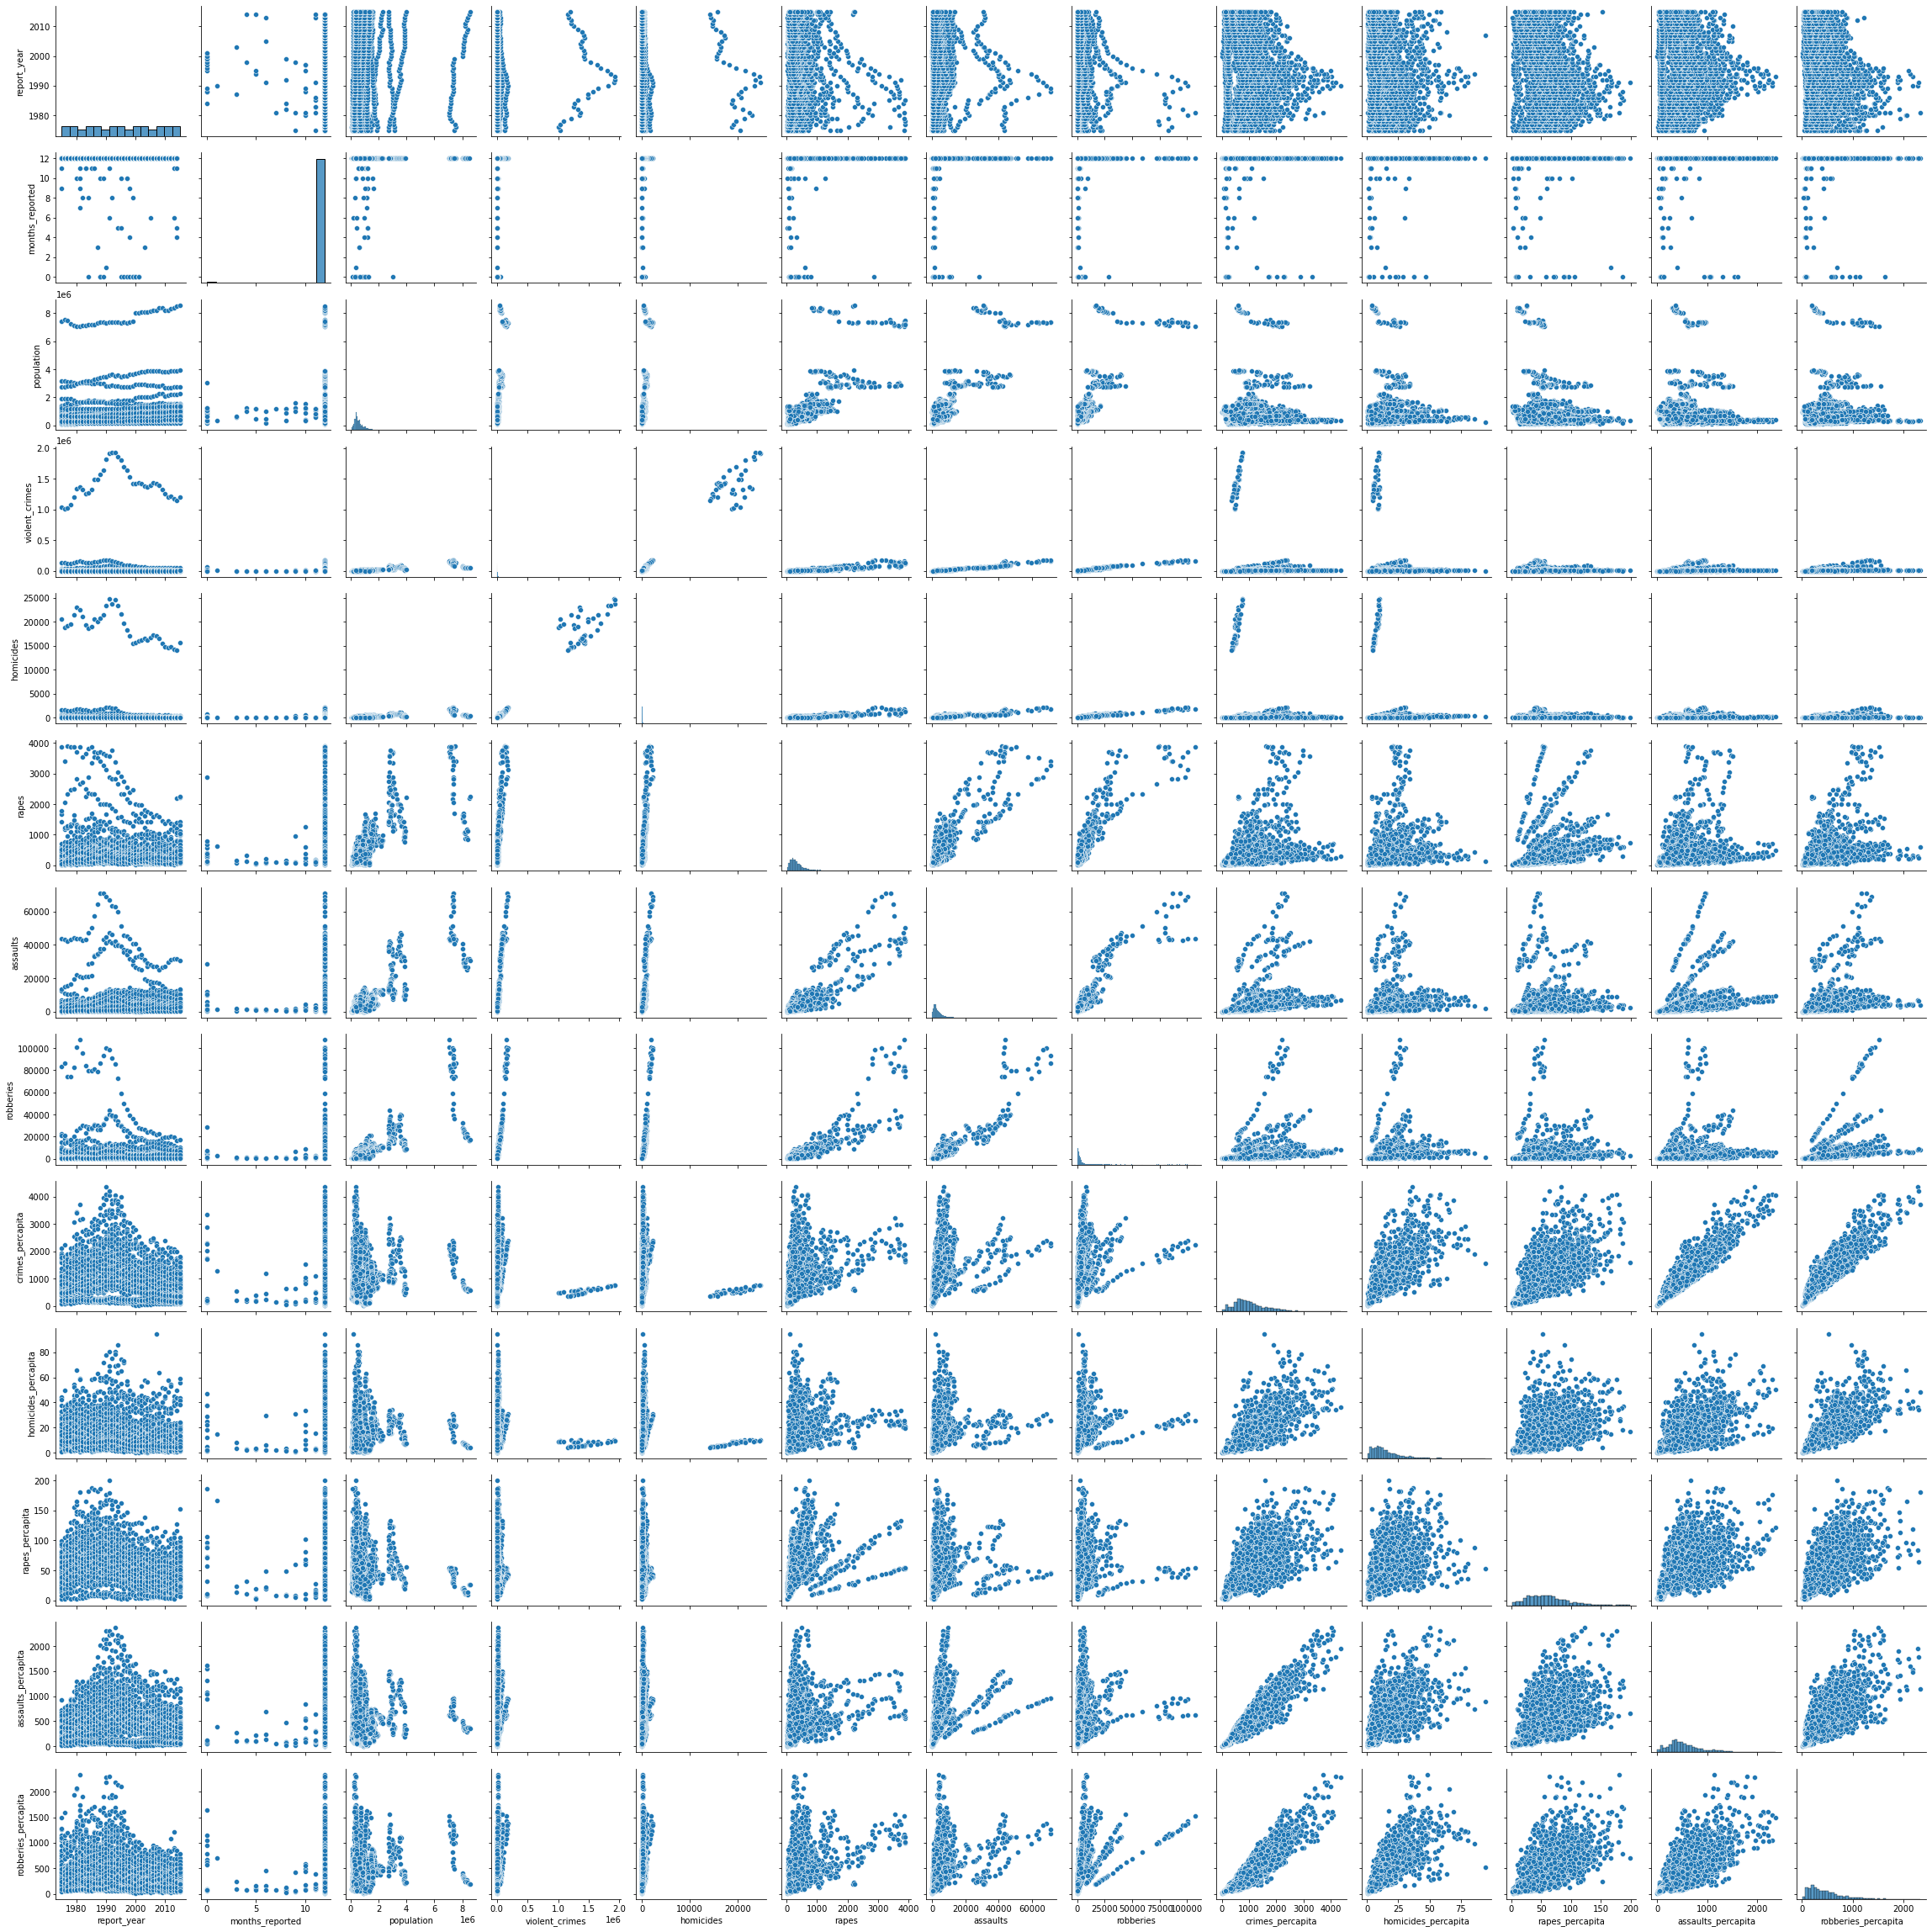

In [6]:
#matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset. 
import seaborn as sns
sns.pairplot(crime_df)

In [7]:
#This block of code uses the unique() function to  to find the unique elements in the column array and renames it as unique_juris
# The next line renames the new data set as x and uses [ :40] to print the first 40 lines.
# The thrid line of code prints the contents of x on new lines using sep = "\n".
# We are able to view a list of all of the cities listed in the data frame 

unique_juris = crime_df["agency_jurisdiction"].unique()
x = unique_juris[:40]
print(*x, sep = "\n")

Albuquerque, NM
Arlington, TX
Atlanta, GA
Aurora, CO
Austin, TX
Baltimore County, MD
Baltimore, MD
Boston, MA
Buffalo, NY
Charlotte, NC
Chicago, IL
Cincinnati, OH
Cleveland, OH
Columbus, OH
Dallas, TX
Denver, CO
Detroit, MI
El Paso, TX
Fairfax County, VA
Fort Worth, TX
Fresno, CA
Honolulu, HI
Houston, TX
Indianapolis, IN
Jacksonville, FL
Kansas City, MO
Las Vegas, NV
Long Beach, CA
Los Angeles County, CA
Los Angeles, CA
Louisville, KY
Memphis, TN
Mesa, AZ
Miami-Dade County, FL
Miami, FL
Milwaukee, WI
Minneapolis, MN
Montgomery County, MD
Nashville, TN
Nassau County, NY


#One column selection: 

I created a new data set in order to sort the cities with the largest populations. 

In [135]:
#First line creates a new data set only using the years 2015.
#Then another subset is created using three columns
#From there, the dataset is sorted by population in descending order
#The first 20 lines are printed

new_data_city = crime_df.query('report_year == 2015')
new_citydf = new_data_city[['report_year','agency_jurisdiction','population']]
city_sort_df = new_citydf.sort_values(["population"], ascending=False)
print(city_sort_df[:10])

      report_year agency_jurisdiction  population
2801         2015   New York City, NY   8550861.0
2789         2015     Los Angeles, CA   3962726.0
2770         2015         Chicago, IL   2728695.0
2782         2015         Houston, TX   2275221.0
2807         2015    Philadelphia, PA   1567810.0
2786         2015       Las Vegas, NV   1562134.0
2808         2015         Phoenix, AZ   1559744.0
2815         2015     San Antonio, TX   1463586.0
2816         2015       San Diego, CA   1400467.0
2821         2015  Suffolk County, NY   1341453.0


#Sort: 
I created a dataset called "A" with the columns "report_year","agency_jurisdiction","crimes_percapita", "homicides_percapita", and "rapes_percapita". I printed the first three lines. From there, I used the sort_values() function to rearrange the data by descending "report_year" and ascending homicide per capita values. This shows us the cities with the lowest homicide values in 2015. 

In [94]:
# The line of code combines five columns from the main data set (crime_df) and renames it new_dataset
# The head function specifies to only use the first three rows

A = crime_df[['report_year','agency_jurisdiction','crimes_percapita', 'homicides_percapita', 'rapes_percapita']]
A1 = A.head(3)
print(A1)

B = A.sort_values(["report_year", "homicides_percapita"], ascending = (False, True))
B1 = B.head(3)
print(B1)


   report_year agency_jurisdiction  crimes_percapita  homicides_percapita  \
0         1975     Albuquerque, NM            832.52                10.48   
1         1975       Arlington, TX            247.16                 4.45   
2         1975         Atlanta, GA           1637.44                37.71   

   rapes_percapita  
0            63.23  
1            24.89  
2            90.30  
      report_year agency_jurisdiction  crimes_percapita  homicides_percapita  \
2799         2015   Nassau County, NY            124.20                 1.23   
2778         2015  Fairfax County, VA             88.41                 1.27   
2781         2015        Honolulu, HI            243.87                 1.50   

      rapes_percapita  
2799             6.41  
2778            11.80  
2781            31.82  


# 5 columns


#Series: Print information about 5 different columns of your choice. The information printed should be relevant to your study. Explain with words your printout.

Column Observation 1: violent crimes

The code below creates two new data sets from the columns "report_year". The first data set shows all crimes committed in 2014 while the second shows all crimes committed in 2015. I then found the sum of the 'violent crimes' columns for each data set. Block 5 contains the formula for the percentage increase that shows that violent crimes increases nationwide by 3.1 from 2014-2015.
    

In [10]:
# Renames dataset to new_data2. Using .query() function, shows where all of the results where the "report year" is equal to 2014
new_data1 = crime_df.query('report_year == 2014')
new_data1

,report_year,months_reported,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
2691,2014,12.0,NM00101,"Albuquerque, NM",558874.0,4934.0,30.0,402.0,3121.0,1381.0,882.85,5.37,71.93,558.44,247.10
2692,2014,12.0,TX22001,"Arlington, TX",382976.0,1854.0,13.0,206.0,1142.0,493.0,484.10,3.39,53.79,298.19,128.73
2693,2014,12.0,GAAPD00,"Atlanta, GA",454363.0,5577.0,93.0,151.0,3004.0,2329.0,1227.43,20.47,33.23,661.15,512.59
2694,2014,12.0,CO00101,"Aurora, CO",350948.0,1430.0,9.0,273.0,734.0,414.0,407.47,2.56,77.79,209.15,117.97
2695,2014,12.0,TX22701,"Austin, TX",903924.0,3581.0,32.0,571.0,2105.0,873.0,396.16,3.54,63.17,232.87,96.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2014,12.0,OK07205,"Tulsa, OK",399556.0,3217.0,46.0,313.0,1938.0,920.0,805.14,11.51,78.34,485.04,230.26
2756,2014,12.0,VA12800,"Virginia Beach, VA",451102.0,667.0,17.0,115.0,285.0,250.0,147.86,3.77,25.49,63.18,55.42
2757,2014,12.0,DCMPD00,"Washington, DC",658893.0,7810.0,105.0,470.0,4004.0,3231.0,1185.32,15.94,71.33,607.69,490.37
2758,2014,12.0,KS08703,"Wichita, KS",387493.0,2939.0,21.0,243.0,2179.0,496.0,758.47,5.42,62.71,562.33,128.00


In [11]:
##This code calculates the totale of violent crimes reported in 2014
#sum1= new_df['rapes'].sum()
#This total is correct and has been verified directly by calculating the sum in the csv file

sum1 = new_data1.loc[:, 'violent_crimes'].sum()
print(sum1)

1574333.0


In [12]:
# Renames dataset to new_data2. Using .query() function, shows where all of the results where the "report year" is equal to 2015
new_data2 = crime_df.query('report_year == 2015')


In [13]:
##This code calculates the totale of violent crimes reported in 2015
#sum1= new_df['rapes'].sum()
#This total is correct and has been verified directly by calculating the sum in the csv file
sum2 = new_data2.loc[:, 'violent_crimes'].sum()
print(sum2)

1623131.0


In [14]:
#Block 5 - Percent increase formula
a = ((sum2-sum1)/sum1)*100
a = round(a, 3)
print("The overall percentage increase in violent crimes from 2014 to 2015 is: ", a)


The overall percentage increase in violent crimes from 2014 to 2015 is:  3.1


Column Observation 2: crimes_percapita
Using the subdata set new_data2, I created another new dataframe only using the following columns: report_year, agency_jurisdiction, population, and crimes_percapita. For this obeservation, I wanted to show the top 20 cities with the highest crimes per capita in 2015.    

In [15]:
#The code below creates a new data set from columns from another subdata set
#The next line of code uses the sort_values function on the column crimes_percapita to sort from highest to lowest
# The third line of code prints onlly the first 20 lines of the sorted_df dataframe.

new = new_data2[['report_year','agency_jurisdiction','population','crimes_percapita']]
sorted2015_df = new.sort_values(["crimes_percapita"], ascending=False)
print(sorted2015_df[:20])

      report_year agency_jurisdiction  population  crimes_percapita
2820         2015       St. Louis, MO    317095.0           1817.12
2776         2015         Detroit, MI    673225.0           1759.59
2791         2015         Memphis, TN    657936.0           1740.14
2795         2015       Milwaukee, WI    600400.0           1596.10
2766         2015       Baltimore, MD    621252.0           1535.93
2803         2015         Oakland, CA    419481.0           1442.50
2785         2015     Kansas City, MO    473373.0           1417.28
2783         2015    Indianapolis, IN    863675.0           1287.98
2826         2015      Washington, DC    672228.0           1202.57
2762         2015         Atlanta, GA    464710.0           1119.62
2768         2015         Buffalo, NY    258096.0           1118.58
2798         2015       Nashville, TN    658029.0           1101.02
2802         2015          Newark, NJ    279110.0           1100.64
2796         2015     Minneapolis, MN    413479.

Column Observation 3: Population

For the 3rd observation, I wanted to examine if population size had a large influence on crime. I ran code that found the cities with the largest populations throughout each year. Not surprisingly, New York was number one each year. Because New York did not have any significant percentage increases in population over a decade, I looked for a city that did. Las Vegas was chosen because it was the city with a fastly rising population from 1975-2015. I first made a new groupby() dataframe using only statistics pertaining to Las Vegas. The data acquired here is best explained visually. In the "Plots" section, I created a heatmap between the population and each of the crime types. 



In [237]:
new_citydf2 = crime_df[['report_year','agency_jurisdiction','population']]
city_sort_df2 = new_citydf2.sort_values(["population"], ascending=False)
print(city_sort_df2[:3])

      report_year agency_jurisdiction  population
2801         2015   New York City, NY   8550861.0
2732         2014   New York City, NY   8473938.0
2387         2009   New York City, NY   8400907.0


In [136]:
df_groupby = crime_df.groupby('agency_jurisdiction')
df_LV = df_groupby.get_group('Las Vegas, NV')
df_LV_cols = df_LV[["report_year","population", "violent_crimes","homicides","rapes","assaults","robberies"]]
df_LV_cols.head(5)

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies
26,1975,249186.0,2594.0,37.0,169.0,1043.0,1345.0
95,1976,265347.0,2473.0,35.0,151.0,1011.0,1276.0
164,1977,279791.0,2729.0,59.0,183.0,1068.0,1419.0
233,1978,288865.0,2886.0,54.0,192.0,1092.0,1548.0
302,1979,324220.0,3210.0,75.0,198.0,1046.0,1891.0


Column Observation 4: Homicides
For the fourth observation, I created dataset that find the top five cities with the most homicides from 2012-2015. The top two just happen to be New York and Chicago each year. The combined dataset only prints the lines where New York and Chicago are stored in each data set for each year. Not surprisngly, the cities with the highest crime rates are ones with the largest populations as well. 

In [137]:
new_dat2 = crime_df.query('report_year == 2015')
new1 = new_dat2[['report_year','agency_jurisdiction','homicides']]
hom2015_df = new1.sort_values(["homicides"], ascending=False)
n1 = hom2015_df[1:6]

new_dat3 = crime_df.query('report_year == 2014')
new2 = new_dat3[['report_year','agency_jurisdiction','homicides']]
hom2014_df = new2.sort_values(["homicides"], ascending=False)
n2 = hom2014_df[1:6]

new_dat4 = crime_df.query('report_year == 2013')
new3 = new_dat4[['report_year','agency_jurisdiction','homicides']]
hom2013_df = new3.sort_values(["homicides"], ascending=False)
n3 = hom2013_df[1:6]

new_dat5 = crime_df.query('report_year == 2012')
new4 = new_dat5[['report_year','agency_jurisdiction','homicides']]
hom2012_df = new4.sort_values(["homicides"], ascending=False)
n4 = hom2012_df[1:6]

combo_frames = [n1, n2, n3, n4]
result_com = pd.concat(combo_frames)
result_com


,report_year,agency_jurisdiction,homicides
2770,2015,"Chicago, IL",478.0
2801,2015,"New York City, NY",352.0
2766,2015,"Baltimore, MD",344.0
2782,2015,"Houston, TX",303.0
2776,2015,"Detroit, MI",295.0
2701,2014,"Chicago, IL",415.0
2732,2014,"New York City, NY",333.0
2707,2014,"Detroit, MI",298.0
2720,2014,"Los Angeles, CA",260.0
2738,2014,"Philadelphia, PA",248.0


Column Observation 5: agency_jurisdiction

For the fifth observation, I wanted to specifically explore one city from the column. I chose New Orleans because it traditionally has a high crime rate. I created a dataframe using the groupby() method to create a new data set from the column 'agency_jurisdiction', then created another subset with every instance of New Orleans. This type of dataframe is particularly useful when comparing crime data over decades in one region, State, city, or jurisdiction. One of the ways a data scientist could use information like this is by plotting the decline in crime for an individual city. From the graph, we see that New Orleans police department saw a sharp increase in crimes per capita in the 1990's. Crimes decreased in 2005 presumably because of Hurricane Katrina, then spiked drastically when the population was at its all time low around 2007.


In [238]:
aj_groupby = crime_df.groupby('agency_jurisdiction')
df_NO = aj_groupby.get_group('New Orleans, LA')
df_NO.tail(10)

,report_year,months_reported,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
2179,2006,12.0,LANPD00,"New Orleans, LA",431153.0,2255.0,162.0,87.0,1245.0,761.0,523.02,37.57,20.18,288.76,176.50
2248,2007,12.0,LANPD00,"New Orleans, LA",220614.0,3451.0,209.0,115.0,1973.0,1154.0,1564.27,94.74,52.13,894.32,523.09
2317,2008,12.0,LANPD00,"New Orleans, LA",281440.0,2869.0,179.0,65.0,1540.0,1085.0,1019.40,63.60,23.10,547.19,385.52
2386,2009,12.0,LANPD00,"New Orleans, LA",336425.0,2614.0,174.0,98.0,1410.0,932.0,776.99,51.72,29.13,419.11,277.03
2455,2010,12.0,LANPD00,"New Orleans, LA",343829.0,2593.0,175.0,144.0,1321.0,953.0,754.15,50.90,41.88,384.20,277.17
2524,2011,12.0,LANPD00,"New Orleans, LA",346974.0,2748.0,200.0,163.0,1326.0,1059.0,791.99,57.64,46.98,382.16,305.21
2593,2012,12.0,LANPD00,"New Orleans, LA",362874.0,2958.0,193.0,136.0,1564.0,1065.0,815.16,53.19,37.48,431.00,293.49
2662,2013,12.0,LANPD00,"New Orleans, LA",377022.0,2965.0,156.0,176.0,1495.0,1138.0,786.43,41.38,46.68,396.53,301.84
2731,2014,12.0,LANPD00,"New Orleans, LA",387113.0,3770.0,150.0,244.0,1906.0,1470.0,973.88,38.75,63.03,492.36,379.73
2800,2015,NaN,LANPD00,"New Orleans, LA",393447.0,3736.0,164.0,409.0,1666.0,1497.0,949.56,41.68,103.95,423.44,380.48


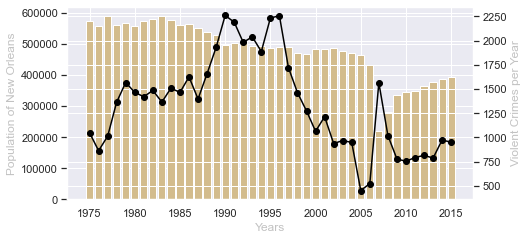

In [242]:
x = df_NO['report_year']
y = df_NO['population']
y1 = df_NO['crimes_percapita']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#D3BC8D')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of New Orleans', color='#C2C2C2')
ax2.set_ylabel('Violent Crimes per Year', color='#C2C2C2')

plt.show()

# Plot:
For observation #3

The heatmap finds correlations between the population of Las Vegas and each of the crime types. From there, we can see that the correlation between population and violent crimes is the hightest. Next, assaults and rapes also have values that are closest to 1.0 meaning that the crime types are highly correlated to the increase in population.Because Las Vegas has grown exponentially since from 1975 to 2015 (526.89 %), it is an excellent example that proves crimes rates are related to population changes. 

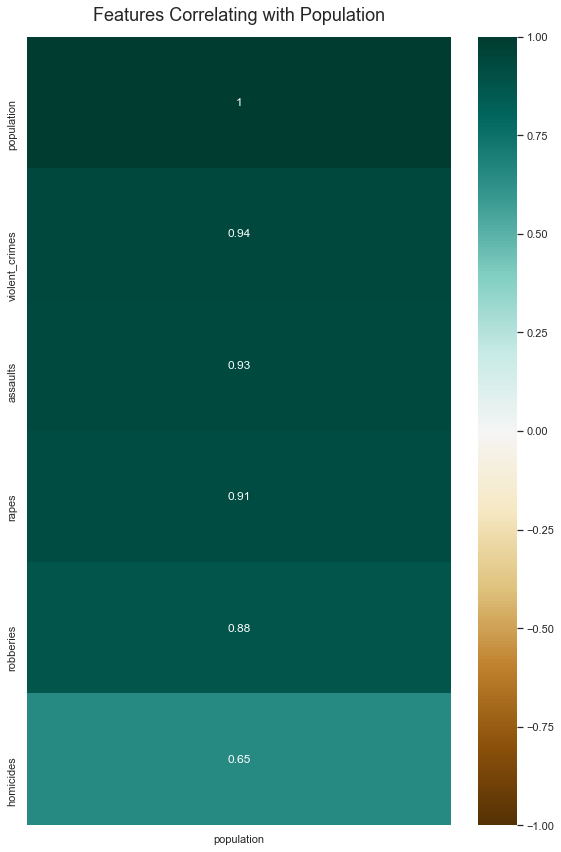

In [255]:
df_LV_cols2 = df_LV_cols[['population','rapes','assaults','violent_crimes', 'robberies', 'homicides']]
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_LV_cols2.corr()[['population']].sort_values(by='population', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Population', fontdict={'fontsize':18}, pad=16);

#In the accompanying graph, we can see that the amount of rapes committed in Las Vegas almost aligns with the population increase. In each of the bar charts, increase in crime types almost perfectly follows the increase in population. Each graph except the rapes bar chart, showed spikes in crime above the population line in the 1990's and early to mid 2000's.

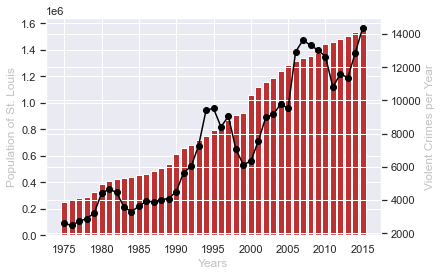

In [143]:
x = df_LV['report_year']
y = df_LV['population']
y1 = df_LV['violent_crimes']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#BC3232')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of Las Vegas', color='#C2C2C2')
ax2.set_ylabel('Violent Crimes per Year', color='#C2C2C2')

plt.show()

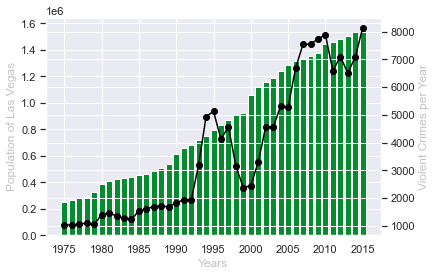

In [147]:
x = df_SLM['report_year']
y = df_SLM['population']
y1 = df_SLM['assaults']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#068B2F')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of Las Vegas', color='#C2C2C2')
ax2.set_ylabel('Violent Crimes per Year', color='#C2C2C2')

plt.show()


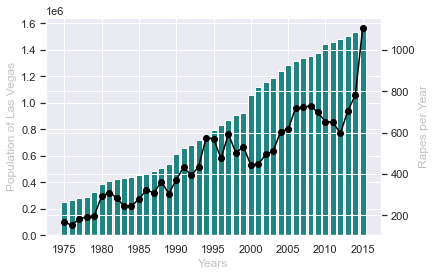

In [144]:
x = df_LV['report_year']
y = df_LV['population']
y1 = df_LV['rapes']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#1F8482')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of Las Vegas', color='#C2C2C2')
ax2.set_ylabel('Rapes per Year', color='#C2C2C2')

plt.show()

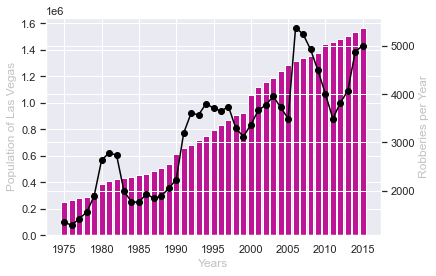

In [145]:
x = df_LV['report_year']
y = df_LV['population']
y1 = df_LV['robberies']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#BD1595')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of Las Vegas', color='#C2C2C2')
ax2.set_ylabel('Robberies per Year', color='#C2C2C2')

plt.show()

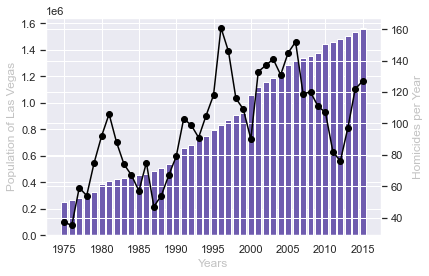

In [146]:
x = df_LV['report_year']
y = df_LV['population']
y1 = df_LV['homicides']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='#6F5CAF')
ax2.plot(x, y1, 'o-', color="black" )

ax1.set_xlabel('Years', color='#C2C2C2')
ax1.set_ylabel('Population of Las Vegas', color='#C2C2C2')
ax2.set_ylabel('Homicides per Year', color='#C2C2C2')

plt.show()

# Summary and Recommendations:
    
Observation 1 data sets show crimes committed in 2014 and 2015. The overall nationwide crime increase from 2014 to 2015 was 3.1%.  The second exploration shows us the cities with the highest crime per capita in 2015 with St. Louis, Detroit, Memphis, Milwaukee, and Baltimore being in the top. Crime per capita is an calculation of crime per every 100,000 residents. 
In the 3rd observation, whether or not population size had a large influence on crime was investigated. New York city surprisingly did not appear in the top five of highest crime per capita cities even though it has held the largest population count for the entire time from 1975-2015.

Las Vegas on the otherhand has not. The city has grown in population more than 500% since 1975. The rise in crime in this city has increased with the population as well. The plots for the different crime types show spikes above the population level in every category except rapes. Only in years 1995 and 2015 were rapes porportional to the population level.This reveals a
positive correlation between crime rates and population size indicating that higher populated cities have higher crime rates.

For the fourth observation, I explored the top five cities with the most homicides from 2012-2015. The top two just happen to be New York and Chicago each year. For the fifth observation, explored one city from the agency_jurisdiction column. For the purpose of the project, New Orleans was chosen because it has traditionally high crime rate. From the graph associated with agency_jurisdiction = New Orleans, LA, we see that New Orleans police department saw a sharp increase in crimes per capita in the lates 1980's to late 1990's. Crimes decreased in 2005 presumably because of Hurricane Katrina, but spiked when the population was at its all time low around 2007. 

During my data exploration, I saw many spikes in crimes in several cities around the same years. It seems the spikes are a result in population increase, natural disaster, and possibly widespread social changes going on around the same time. The dataset would be more effective if it listed crime reports by months as well in order to find direct correlations with major events and increases/decreases in crime. The dataset would also benefit from the inclusion of zip codes so each major city can be examined by areas. Knowing which neighborhoods have the highest rates of specific crime types would help first responders be more prepared for emergency situations. 